# Chicago Crime Analysis

## Data Loading

In [ ]:
#Importing the necessary libraries

#libraries for data wrangling
import gdown
import pandas as pd
import numpy as np

#libraries for visualization
import matplotlib.pyplot as plt
# import seaborn as sns

#libraries for time
from datetime import datetime, timedelta

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set up views
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [4]:
# #Load the data

# url = "https://drive.google.com/file/d/1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X/view?usp=sharing"
# id = "1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X"

# gdown.download(f"https://drive.google.com/uc?id={id}", quiet=False)

# df = 

In [5]:
#Loading the data

data_path = r"archive.zip"
df = pd.read_csv(data_path, low_memory=True, compression='zip') #how to load zipped csv files
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7784659,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19.0,44.0,6.0,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
7784660,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5.0,9.0,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
7784661,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3.0,5.0,43.0,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
7784662,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.0,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"
7784663,12840464,JF411839,09/26/2022 07:20:00 PM,0000X N MASON AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,1513,15.0,29.0,25.0,15,1136773.0,1899652.0,2022,01/03/2023 03:46:28 PM,41.880802,-87.773246,"(41.880802263, -87.773245737)"


## Preliminary Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [15]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (7784664, 22)


In [16]:
print(f"Dataset columns: {df.columns}")

Dataset columns: Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], dtype='object')


In [17]:
print(f"Columns containing null cells: \n{df.isna().sum()}")

Columns containing null cells: 
ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64


In [24]:
print(f"Duplicate entries {df.duplicated().sum()}")

Duplicate entries 0


In [6]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,7.784664e+06,7.784664e+06,7.784617e+06,7.169816e+06,7.171188e+06,7.697816e+06,7.697816e+06,7.784664e+06,7.697816e+06,7.697816e+06
mean,7.026439e+06,1.185918e+03,1.129466e+01,2.275420e+01,3.748472e+01,1.164601e+06,1.885783e+06,2.009944e+03,4.184218e+01,-8.767149e+01
std,3.502657e+06,7.031335e+02,6.952422e+00,1.385106e+01,2.154115e+01,1.684658e+04,3.227531e+04,6.260628e+00,8.879598e-02,6.108257e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.792574e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152976e+06,1.859073e+06,2.005000e+03,4.176871e+01,-8.771367e+01
50%,7.029327e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166110e+06,1.890730e+06,2.009000e+03,4.185591e+01,-8.766584e+01
75%,1.013113e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176372e+06,1.909273e+06,2.015000e+03,4.190677e+01,-8.762819e+01
max,1.305643e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.023000e+03,4.202291e+01,-8.752453e+01


## Data Cleaning

In [21]:
# Dropping empty cells due the vast amount of empty cells

df.dropna(axis= 0, inplace=True)


In [22]:
df.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [23]:
df.shape

(7084435, 22)

In [29]:
#Renaming columns for easy access
initial_columns = [i for i in df.columns if " " in i]
df = df.rename(columns={i : i.replace(" ", "_") for i in initial_columns})
df.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"


## Exploratory Data Analysis

In [30]:
df.columns

Index(['ID', 'Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type', 'Description', 'Location_Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community_Area', 'FBI_Code', 'X_Coordinate', 'Y_Coordinate', 'Year', 'Updated_On', 'Latitude', 'Longitude', 'Location'], dtype='object')

In [41]:
#Most common types of crimes in the dataset
crimes = df["Primary_Type"].value_counts().head(10)
print(f"Top 10 crimes \n{crimes}")

Top 10 crimes 
Primary_Type
THEFT                  1499197
BATTERY                1299859
CRIMINAL DAMAGE         811905
NARCOTICS               669097
ASSAULT                 465810
OTHER OFFENSE           440288
BURGLARY                390418
MOTOR VEHICLE THEFT     339630
DECEPTIVE PRACTICE      302833
ROBBERY                 267994
Name: count, dtype: int64


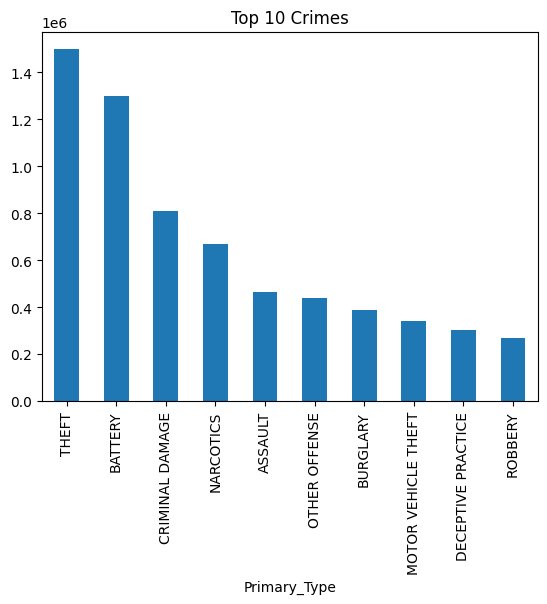

In [48]:
crimes.plot(kind='bar', x = "Crime Types", y= "Frequency",title="Top 10 Crimes")
plt.show()



In [53]:
# top locations where incidents occur
locations = df["Location_Description"].value_counts().head(10)
print(f"Top ten locations where crimes occur: \n{locations}")

Top ten locations where crimes occur: 
Location_Description
STREET                            1825181
RESIDENCE                         1165529
APARTMENT                          831792
SIDEWALK                           687096
OTHER                              239180
PARKING LOT/GARAGE(NON.RESID.)     181751
ALLEY                              158415
SMALL RETAIL STORE                 136575
SCHOOL, PUBLIC, BUILDING           131382
RESIDENCE-GARAGE                   122142
Name: count, dtype: int64


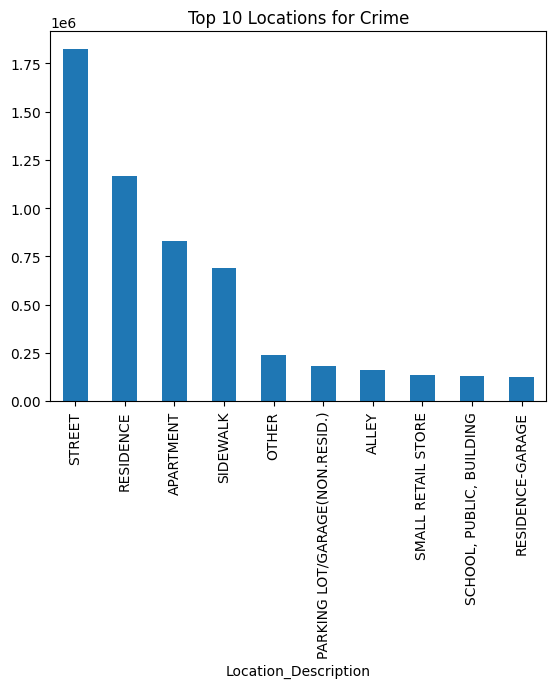

In [55]:
locations.plot(kind='bar', x = "Location", y= "Frequency",title="Top 10 Locations for Crime")
plt.show()

In [ ]:
#How distribution of arrests vary across different types of crimes
